In [1]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = zipfile.ZipFile("Data/playground-series-s4e2.zip",'r').extractall(path = 'Data/Obesity-Risk/')

In [3]:
! ls Data/Obesity-Risk

sample_submission.csv  test.csv  train.csv


## Data visualisation

In [2]:
train_data = pd.read_csv('Data/Obesity-Risk/train.csv')
train_data.drop('id',axis = 1,inplace = True)
train_data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [4]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [5]:
train_data['Gender'].value_counts()

Gender
Female    10422
Male      10336
Name: count, dtype: int64

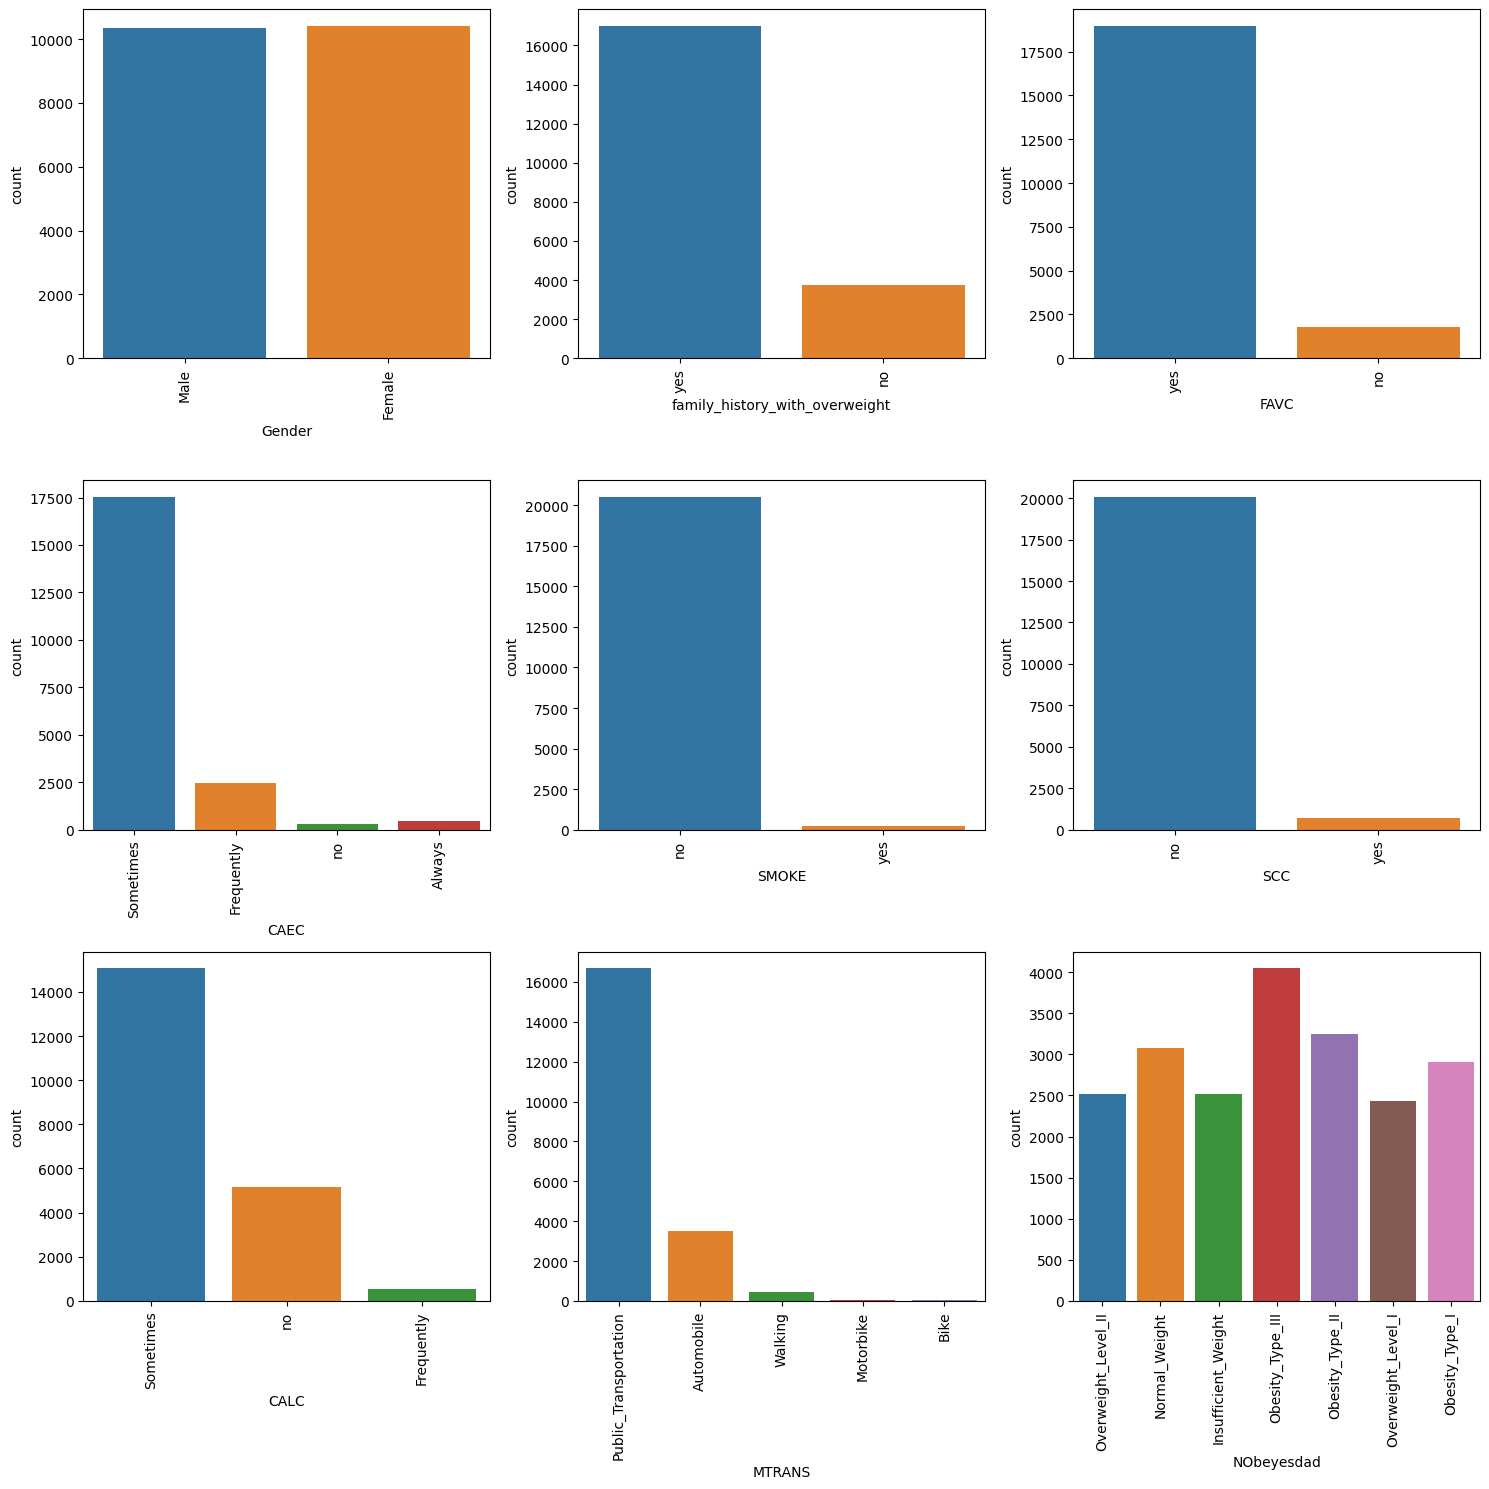

In [6]:
fig,axs = plt.subplots(3,3,figsize = (15,15))
i,j = -1,0
obj_cols_data = [colname for colname in train_data.columns if train_data[colname].dtype==np.dtype('O')]
for colname in obj_cols_data:
    if (j%3==0):
        j=0
        i+=1
    ax = sns.countplot(data = train_data,x = colname,ax=axs[i][j],hue = colname)
    ax.set_xticks(ticks= train_data[colname].unique(),labels =train_data[colname].unique(),rotation=90)
    j+=1
plt.tight_layout()

In [7]:
train_data['BMI'] = train_data['Weight']/(train_data['Height']**2)
train_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,36.587084
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,17.099278
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,31.889841
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II,28.899693


In [8]:
train_data['Gender'] = train_data['Gender'].map({'Male':0,'Female':1})
train_data['family_history_with_overweight'] = train_data['family_history_with_overweight'].map({'yes':0,'no':1})
train_data['FAVC'] = train_data['FAVC'].map({'yes':0,'no':1})
train_data['CAEC'] = train_data['CAEC'].map({'Sometimes':0,'Frequently':1,'no':2,'Always':3})
train_data['SMOKE'] = train_data['SMOKE'].map({'no':0,'yes':1})
train_data['SCC'] = train_data['SCC'].map({'no':0,'yes':1})
train_data['CALC'] = train_data['CALC'].map({'Sometimes':0,'no':1,'Frequently':2})
train_data['MTRANS'] = train_data['MTRANS'].map({'Public_Transportation':0,'Automobile':1,'Walking':2,'Motorbike':3,'Bike':4})
train_data['NObeyesdad'] = train_data['NObeyesdad'].map({'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,
                                                         'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6})

## Finding the best model

In [9]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [10]:
X = train_data.drop('NObeyesdad',axis = 1)
y = train_data['NObeyesdad']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [31]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train,y_train)
scaled_X_test = scaler.transform(X_test)

In [32]:
# 1. Base model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(scaled_X_train,y_train)

DecisionTreeClassifier()

In [33]:
preds = dtc.predict(scaled_X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       480
           1       0.82      0.80      0.81       635
           2       0.68      0.64      0.66       489
           3       0.68      0.70      0.69       507
           4       0.80      0.82      0.81       589
           5       0.94      0.95      0.94       663
           6       0.99      0.99      0.99       789

    accuracy                           0.84      4152
   macro avg       0.83      0.83      0.83      4152
weighted avg       0.84      0.84      0.84      4152



In [35]:
# Model 2 
DTC = DecisionTreeClassifier(criterion = 'entropy',max_features = 15,min_samples_leaf=20,random_state=101)
DTC.fit(scaled_X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features=15,
                       min_samples_leaf=20, random_state=101)

In [36]:
np.round(DTC.feature_importances_,3)*100

array([14.7,  2.1,  1. , 11.9,  0.2,  0.7,  0.6,  0.6,  0.2,  0. ,  1.1,
        0. ,  0.3,  0.5,  0.3,  0.2, 65.6])

In [37]:
preds_2 = DTC.predict(scaled_X_test)

In [38]:
print(classification_report(y_test,preds_2))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       480
           1       0.84      0.85      0.85       635
           2       0.73      0.74      0.73       489
           3       0.80      0.76      0.78       507
           4       0.86      0.85      0.86       589
           5       0.94      0.96      0.95       663
           6       0.99      1.00      0.99       789

    accuracy                           0.88      4152
   macro avg       0.87      0.87      0.87      4152
weighted avg       0.88      0.88      0.88      4152



In [39]:
# Model 3
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,HistGradientBoostingClassifier

In [40]:
ABC = AdaBoostClassifier(algorithm = 'SAMME')
ABC.fit(scaled_X_train,y_train)

AdaBoostClassifier(algorithm='SAMME')

In [41]:
preds_3 = ABC.predict(scaled_X_test)
print(classification_report(y_test,preds_3))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       480
           1       0.72      0.82      0.77       635
           2       0.75      0.49      0.59       489
           3       0.65      0.81      0.72       507
           4       0.88      0.64      0.74       589
           5       0.72      0.98      0.83       663
           6       1.00      0.89      0.94       789

    accuracy                           0.79      4152
   macro avg       0.79      0.77      0.77      4152
weighted avg       0.80      0.79      0.78      4152



In [42]:
# Model 4
RFC = RandomForestClassifier()
RFC.fit(scaled_X_train,y_train)

RandomForestClassifier()

In [43]:
preds_4 = RFC.predict(scaled_X_test)
print(classification_report(y_test,preds_4))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       480
           1       0.86      0.89      0.88       635
           2       0.82      0.77      0.79       489
           3       0.80      0.83      0.82       507
           4       0.90      0.89      0.90       589
           5       0.96      0.97      0.97       663
           6       1.00      1.00      1.00       789

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



In [44]:
# Model 5
RFC_m = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',max_features = 5,oob_score = True,n_jobs = -1,random_state=101)
RFC_m.fit(scaled_X_train,y_train)
preds_5 = RFC_m.predict(scaled_X_test)
print(classification_report(y_test,preds_5))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       480
           1       0.87      0.89      0.88       635
           2       0.82      0.76      0.79       489
           3       0.80      0.84      0.82       507
           4       0.91      0.88      0.90       589
           5       0.96      0.97      0.97       663
           6       1.00      1.00      1.00       789

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



In [45]:
RFC_m.feature_importances_

array([0.06559804, 0.05608187, 0.04588941, 0.25788742, 0.01508549,
       0.00703794, 0.08473336, 0.01671146, 0.01242544, 0.00044043,
       0.02089529, 0.00258103, 0.01789343, 0.01974146, 0.01399334,
       0.00696196, 0.35604265])

In [46]:
# Model 6
GBC = HistGradientBoostingClassifier()
GBC.fit(scaled_X_train,y_train)
preds_6 = GBC.predict(scaled_X_test)
print(classification_report(y_test,preds_6))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       480
           1       0.89      0.90      0.89       635
           2       0.83      0.78      0.80       489
           3       0.82      0.85      0.83       507
           4       0.90      0.88      0.89       589
           5       0.96      0.98      0.97       663
           6       1.00      1.00      1.00       789

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



## Automating the process using a Pipeline

In [132]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [133]:
train_data = pd.read_csv('Data/Obesity-Risk/train.csv')
train_data.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [134]:
target = 'NObeyesdad'
categorical_columns = [colname for colname in train_data.columns if train_data[colname].dtype == np.dtype('O')]
categorical_columns.remove(target)
numerical_columns = [colname for colname in train_data.columns if train_data[colname].dtype == np.dtype('float64')]

In [135]:
X = train_data.drop(target,axis = 1)
y = train_data[target]

In [136]:
from sklearn.preprocessing import RobustScaler,OrdinalEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer

In [137]:
def drop_id(df):
    return df.drop('id',axis = 1)

def add_bmi_col(df):
    df['bmi'] = df['Weight']/(df['Height']**2)
    return df

In [138]:
CT = ColumnTransformer([('add_bmi',FunctionTransformer(add_bmi_col,validate=False),['Weight','Height']),
                        ('categorical_pipeline',OrdinalEncoder(),categorical_columns),
                        ('numerical_pipeline',"passthrough",numerical_columns)],n_jobs = -1)

In [139]:
model_pipeline = Pipeline([('col_transform',CT),
                           ('Scaler',RobustScaler()),
                           ('model',HistGradientBoostingClassifier())])

In [140]:
model_pipeline.fit(X,y)

Pipeline(steps=[('col_transform',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('add_bmi',
                                                  FunctionTransformer(func=<function add_bmi_col at 0x7cba9488fce0>),
                                                  ['Weight', 'Height']),
                                                 ('categorical_pipeline',
                                                  OrdinalEncoder(),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('numerical_pipeline',
                                                  'passthrough',
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE'])])),
                ('Scaler', RobustScaler()),
                ('model', HistGradientBoostingClassifier())])

In [141]:
test_data = pd.read_csv('Data/Obesity-Risk/test.csv')
test_data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [153]:
test_data['CALC'] = test_data['CALC'].replace('Always','Frequently')

In [154]:
final_preds = model_pipeline.predict(test_data)

In [155]:
final_preds

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [168]:
final_df = pd.DataFrame({'id':test_data['id'],'NObeyesdad':final_preds}).set_index('id')
final_df.to_csv('Predictions/Obesity_Risk/submission_1.csv')

In [169]:
final_df

,NObeyesdad
id,
20758,Obesity_Type_II
20759,Overweight_Level_I
20760,Obesity_Type_III
20761,Obesity_Type_I
20762,Obesity_Type_III
...,...
34593,Overweight_Level_II
34594,Normal_Weight
34595,Insufficient_Weight
